In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv(r'/content/drive/MyDrive/MCOE/DS BDA/PARTB-DATASETS/airquality_data.csv',encoding='cp1252')
df.head()

<ipython-input-6-c270bad16a88>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/content/drive/MyDrive/MCOE/DS BDA/PARTB-DATASETS/airquality_data.csv',encoding='cp1252')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [9]:
df=df.fillna(df.median())
df.isnull().sum()

<ipython-input-9-3bf4654e2c82>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.median())


stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64

In [10]:
df['agency'].dtypes

dtype('O')

In [11]:
df = df.fillna({'agency':'no agency'})

In [12]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,no agency,"Residential, Rural and other Areas",4.8,17.4,90.0,187.0,NaN,32.0,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,no agency,Industrial Area,3.1,7.0,90.0,187.0,NaN,32.0,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,no agency,"Residential, Rural and other Areas",6.2,28.5,90.0,187.0,NaN,32.0,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,no agency,"Residential, Rural and other Areas",6.3,14.7,90.0,187.0,NaN,32.0,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,no agency,Industrial Area,4.7,7.5,90.0,187.0,NaN,32.0,1990-03-01


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,so2,no2,rspm,spm,pm2_5
so2,1.000000,0.338407,0.135677,0.109633,-0.006716
no2,0.338407,1.000000,0.339227,0.229387,0.048990
rspm,0.135677,0.339227,1.000000,0.449869,0.067557
spm,0.109633,0.229387,0.449869,1.000000,-0.005961
pm2_5,-0.006716,0.048990,0.067557,-0.005961,1.000000


KeyboardInterrupt: ignored

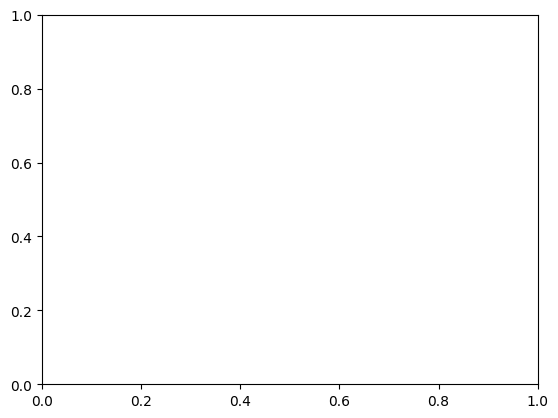

In [15]:
sns.lineplot(x='so2',y='no2',data=df)

In [ ]:
# Line Chart
plt.plot(df['no2'], df['so2'])
plt.xlabel('no2')
plt.ylabel('so2')
plt.title('so2 Levels over no2')
plt.xticks(rotation=45)
plt.show()


In [ ]:
sns.scatterplot(x='spm',y='so2',data=df)

<Axes: xlabel='spm', ylabel='so2'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


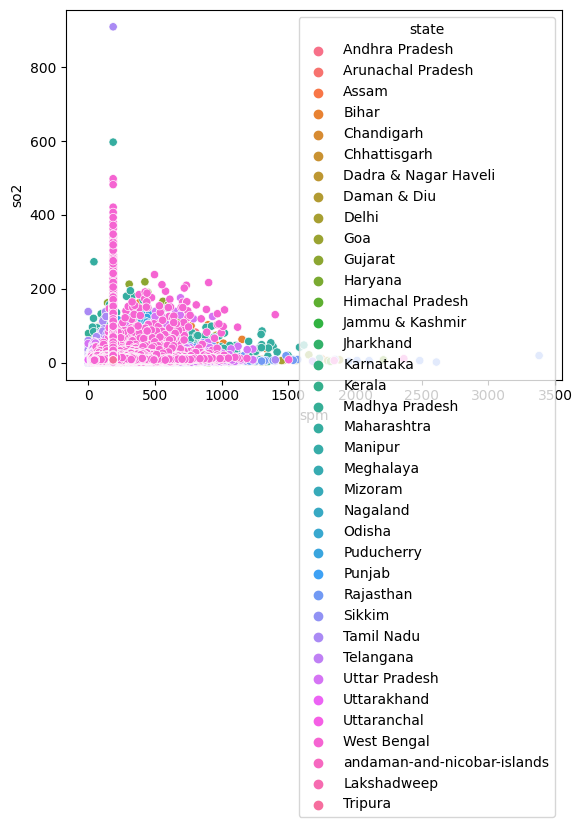

In [16]:
# Scatterplot
sns.scatterplot(x='spm', y='so2', hue='state', data=df)


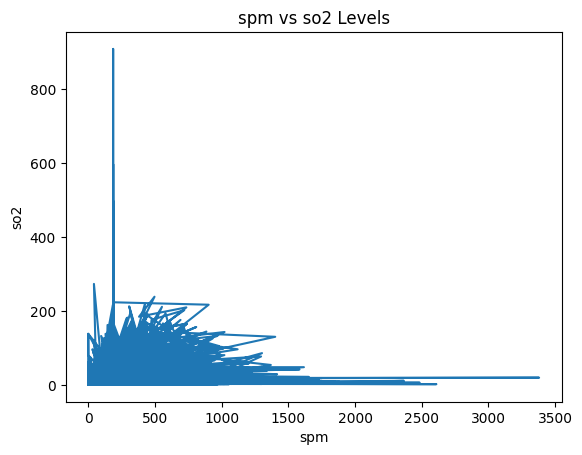

In [18]:
plt.plot(df['spm'], df['so2'])
plt.xlabel('spm')
plt.ylabel('so2')
plt.title('spm vs so2 Levels')
plt.show()

In [ ]:
sns.pairplot(df)

In [ ]:
sns.distplot(df['rspm'])

In [ ]:
# Barplot
sns.barplot(x='type', y='spm', data=df)
plt.xlabel('spm')
plt.title('Type by spm')
plt.show()

In [ ]:
# Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Histogram
plt.hist(df['type'].dropna(), bins=10)
plt.xlabel('type')
plt.ylabel('Frequency')
plt.title('Type Distribution')
plt.show()

In [ ]:
# Boxplot
sns.boxplot(x='no2', y='rspm', data=df)
plt.xlabel('no2')
plt.ylabel('rspm')
plt.title('no2 by rspm')
plt.show()



In [ ]:
# Violin Plot
sns.violinplot(x='Month', y='Temp', data=df)
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Temperature Distribution by Month')
plt.show()

In [ ]:
# Time Series Chart (assuming dataset has a date/time column)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
plt.plot(df.index, df['Ozone'])
plt.xlabel('Date')
plt.ylabel('Ozone')
plt.title('Time Series Chart')
plt.xticks(rotation=45)
plt.show()